In [21]:
import matplotlib.pyplot as plt
import scipy.integrate as sp
import numpy as np
import pysindy as ps




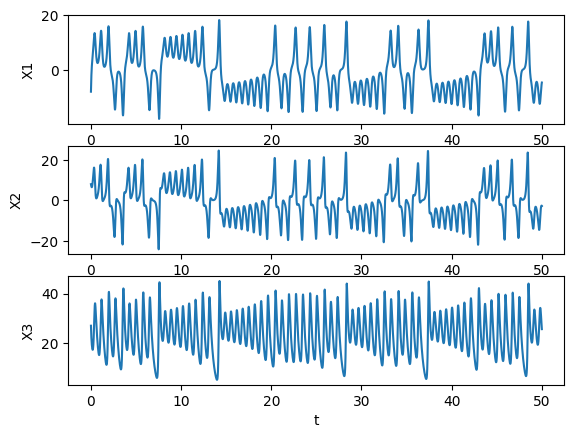

In [22]:
# Step 1: Generate data
def lorenz(t, y, sigma, beta, rho):
    y1, y2, y3 = y
    return [sigma*(y2-y1), y1*(rho-y3)-y2, y1*y2-beta*y3]

dt = 0.001
t = np.arange(0, 50, dt)

X0 = [-8, 8, 27]

sigma = 10
beta = 8/3
rho = 28
X = sp.odeint(lambda t, y: lorenz(t, y, sigma, beta, rho), X0, t, tfirst=True)
n = X.shape[1]



# plot orbit
plt.ion()
plt.figure()

for i in range(0, n):
    plt.subplot(n, 1, i+1)
    plt.plot(t, X[:, i])
    plt.ylabel('X'+str(i+1))
    
plt.xlabel('t')
plt.show()


# Step 1: Using finite differences to obtain the derivative matrix. | Mainly used for noise-free orbits.
differentiation_method = ps.FiniteDifference(order=2)


In [23]:
# Step 2: Build basis library
feature_library = ps.PolynomialLibrary(degree=3)


In [24]:
# Step 3: Solve
optimizer = ps.STLSQ(threshold=0.2)

# model = ps.SINDy(
#     differentiation_method=differentiation_method,
#     feature_library=feature_library,
#     optimizer=optimizer,
#     feature_names=["x", "y", "z"],
# )

model = ps.SINDy(
    differentiation_method=differentiation_method,
    feature_library=feature_library,
    optimizer=optimizer,
)

model.fit(X, t=t)

model.print(precision=6)


(x[0])' = -9.999781 * x[0] + 9.999781 * x[1]
(x[1])' = 27.998018 * x[0] - 0.999615 * x[1] - 0.999944 * x[0]*x[2]
(x[2])' = -2.666588 * x[2] + 0.999971 * x[0]*x[1]


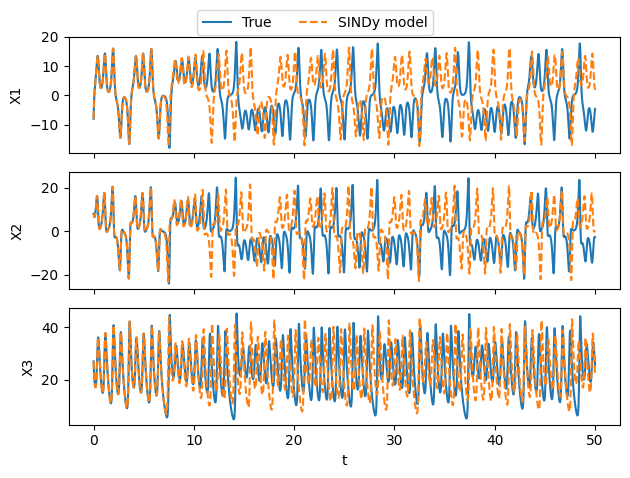

In [25]:
#Step 4: Evaluate
x0, y0, z0 = X0
sim = model.simulate([x0, y0, z0], t=t)

# plot orbit
plt.ion()

fig = plt.figure()
for i in range(0, n):
    plt.subplot(n, 1, i+1)
    plt.plot(t, X[:, i], label='True')
    plt.plot(t, sim[:, i], '--', label='SINDy model')
    plt.ylabel('X'+str(i+1))

    if i < n-1: 
        plt.tick_params(axis='x', labelbottom=False)

plt.xlabel('t')

handles, labels = plt.gca().get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, 1), ncol=2)

plt.tight_layout()
plt.subplots_adjust(top=0.93)
plt.show()

